## TranPD Results Evaluation

🔍 Number of Peaks Detected:
Ws30_Dim16 : 336
Ws60_Dim32 : 336
Ws60_Dim16 : 336

🔁 Overlaps:
Peaks common to ALL models     : 153


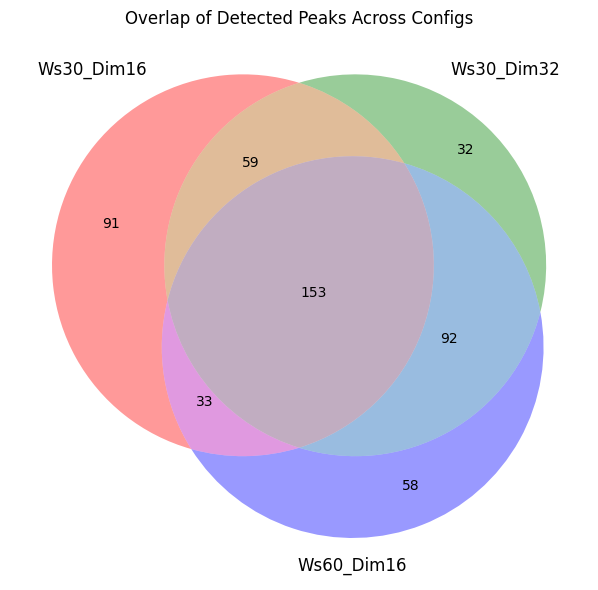

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  # Supports up to 3 sets
import os

# === Step 1: Load peak files ===
# You can update these paths as needed
csv_30_16 = "/content/Peaks_Ws30_Dim16.csv"
csv_60_32 = "/content/Peaks_Ws60_Dim32.csv"
csv_60_16 = "/content/Peaks_Ws60_Dim16.csv"

# Read CSVs
df_30_16 = pd.read_csv(csv_30_16)
df_60_32 = pd.read_csv(csv_60_32)
df_60_16 = pd.read_csv(csv_60_16)

# === Step 2: Extract peak timestamps ===
peaks_30_16 = set(df_30_16[df_30_16["Peak"] == 1]["Timestamp"])
peaks_60_32 = set(df_60_32[df_60_32["Peak"] == 1]["Timestamp"])
peaks_60_16 = set(df_60_16[df_60_16["Peak"] == 1]["Timestamp"])

# === Step 3: Show basic counts ===
print("🔍 Number of Peaks Detected:")
print(f"Ws30_Dim16 : {len(peaks_30_16)}")
print(f"Ws60_Dim32 : {len(peaks_60_32)}")
print(f"Ws60_Dim16 : {len(peaks_60_16)}")

# === Step 4: Compare overlaps ===
common_all = peaks_30_16 & peaks_60_32 & peaks_60_16
# common_30 = peaks_30_16 & peaks_60_32
# common_30_60 = peaks_30_16 & peaks_60_16

print("\n🔁 Overlaps:")
print(f"Peaks common to ALL models     : {len(common_all)}")

# === Step 5: Visualize using Venn Diagram ===
plt.figure(figsize=(8, 6))
venn3([peaks_30_16, peaks_60_32, peaks_60_16],
      set_labels=('Ws30_Dim16', 'Ws30_Dim32', 'Ws60_Dim16'))
plt.title("Overlap of Detected Peaks Across Configs")
plt.tight_layout()
plt.grid(False)
plt.show()

### Check Peak Indices, Peak Distribution

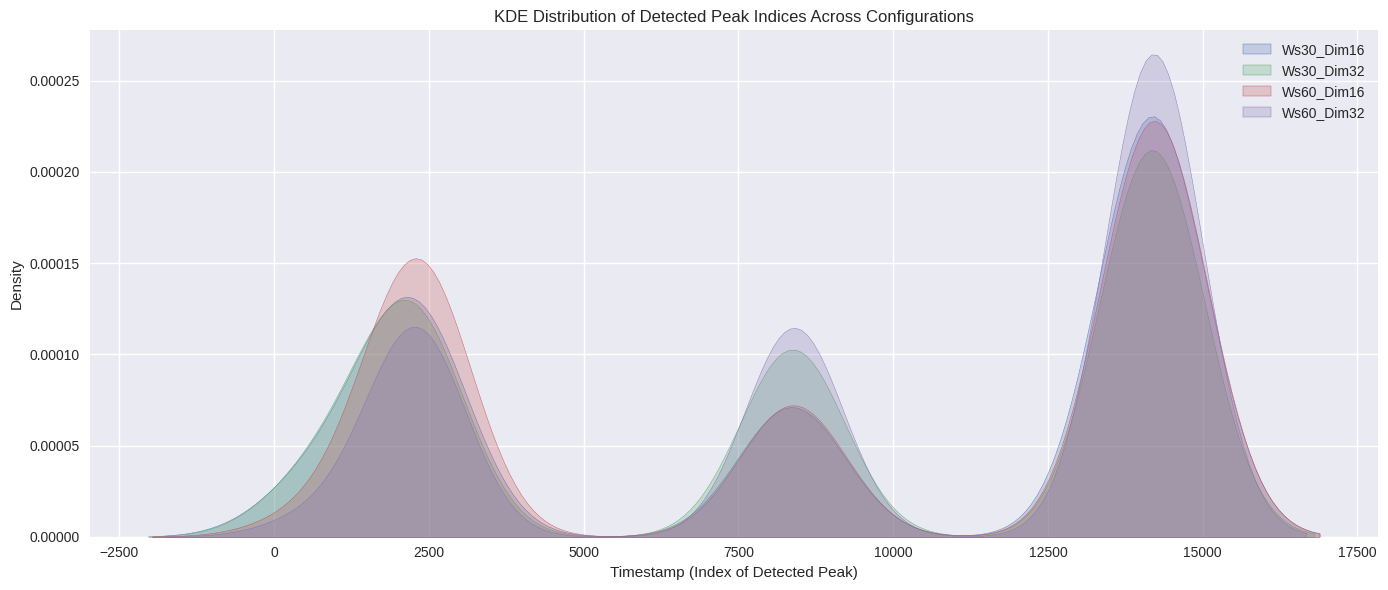

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for the 4 configurations
file_paths = {
    "Ws30_Dim16": "/content/Peaks_Ws30_Dim16.csv",
    "Ws30_Dim32": "/content/Peaks_Ws30_Dim32.csv",
    "Ws60_Dim16": "/content/Peaks_Ws60_Dim16.csv",
    "Ws60_Dim32": "/content/Peaks_Ws60_Dim32.csv",
}

# Dictionary to hold the peak indices from each config
peak_indices = {}

# Load each CSV and extract timestamps where Peak == 1
for config_name, path in file_paths.items():
    df = pd.read_csv(path)
    peak_ts = df[df["Peak"] == 1]["Timestamp"].values
    peak_indices[config_name] = peak_ts

# === Plotting KDE ===
plt.figure(figsize=(14, 6))

for config, timestamps in peak_indices.items():
    sns.kdeplot(timestamps, label=config, fill=True, bw_adjust=0.5)

plt.title("KDE Distribution of Detected Peak Indices Across Configurations")
plt.xlabel("Timestamp (Index of Detected Peak)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Peak - Non_Peak Classification

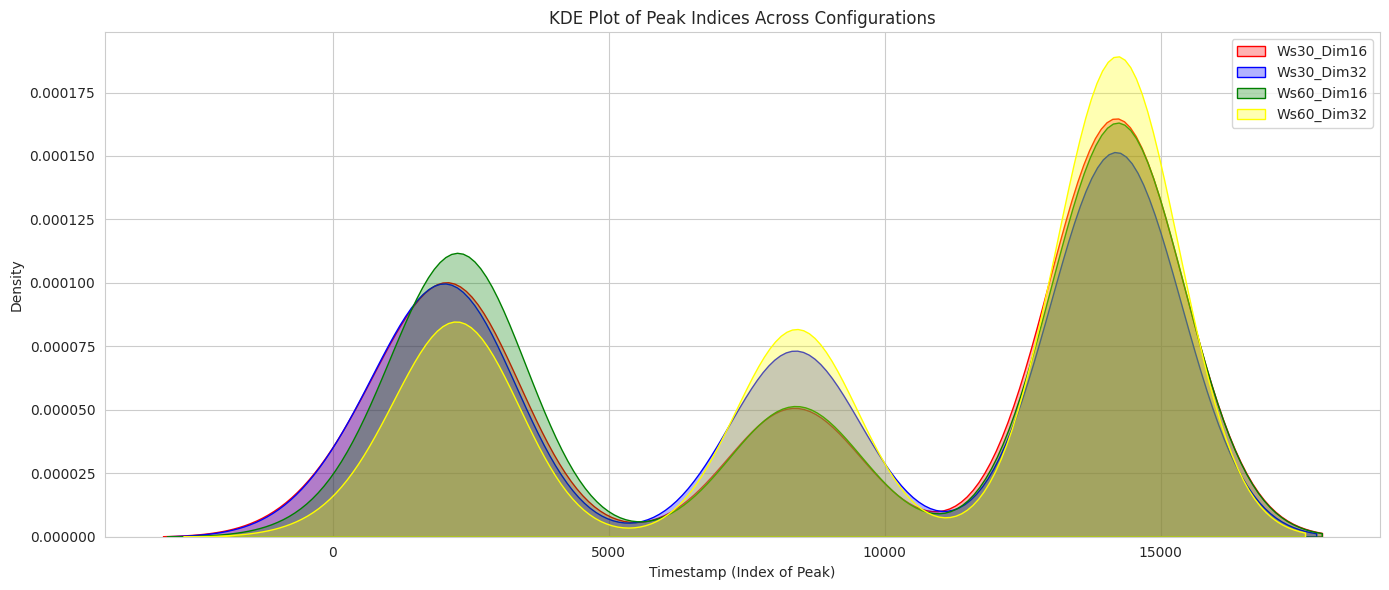

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Use white background for clean visuals ===
sns.set_style("whitegrid")  # or "white" if you don't want grid lines

# Define file paths for the 4 configurations
file_paths = {
    "Ws30_Dim16": "/content/Peaks_Ws30_Dim16.csv",
    "Ws30_Dim32": "/content/Peaks_Ws30_Dim32.csv",
    "Ws60_Dim16": "/content/Peaks_Ws60_Dim16.csv",
    "Ws60_Dim32": "/content/Peaks_Ws60_Dim32.csv",
}

# Define bright colors for each config
colors = {
    "Ws30_Dim16": "red",
    "Ws30_Dim32": "blue",
    "Ws60_Dim16": "green",
    "Ws60_Dim32": "yellow"
}

# Dictionary to hold the peak indices from each config
peak_indices = {}

# Load each CSV and extract timestamps where Peak == 1
for config_name, path in file_paths.items():
    df = pd.read_csv(path)
    peak_ts = df[df["Peak"] == 1]["Timestamp"].values
    peak_indices[config_name] = peak_ts

# === Plotting KDE ===
plt.figure(figsize=(14, 6))

for config, timestamps in peak_indices.items():
    sns.kdeplot(
        timestamps,
        label=config,
        fill=True,
        bw_adjust=0.7,
        color=colors[config],
        alpha=0.3
    )

plt.title("KDE Plot of Peak Indices Across Configurations")
plt.xticks(ticks=np.arange(0, len(errors), 300), rotation=90)
plt.xlabel("Timestamp (Index of Peak)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Optional: Save in high quality
plt.savefig("kde_peak_distribution.png", dpi=900)

plt.show()

In [ ]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=a921a599c2c82695f74971d0ac46fe82d2804026460bfdb0528ef1f0f740b4e2
  Stored in directory: /root/.cache/pip/wheels/7b/ce/88/1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


## Check Line Plot

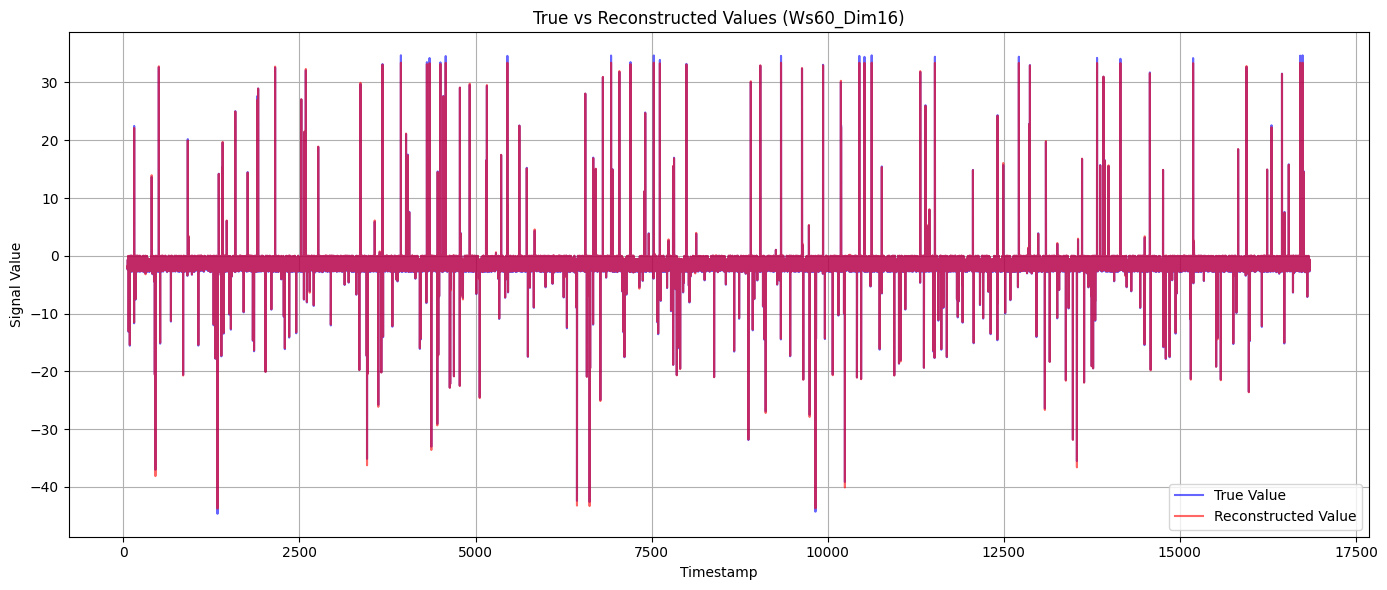

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load your result CSV ===
csv_path = "/content/Peaks_Ws60_Dim16.csv"  # Change this as needed
df = pd.read_csv(csv_path)

# === Step 2: Plot true vs reconstructed values ===
plt.figure(figsize=(14, 6))

# Plot true value
plt.plot(df["Timestamp"], df["True_Value"], label="True Value", color="blue", alpha=0.6)

# Plot reconstructed value
plt.plot(df["Timestamp"], df["Reconstructed_Value"], label="Reconstructed Value", color="red", alpha=0.6)

plt.title("True vs Reconstructed Values (Ws60_Dim16)")
plt.xlabel("Timestamp")
plt.ylabel("Signal Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

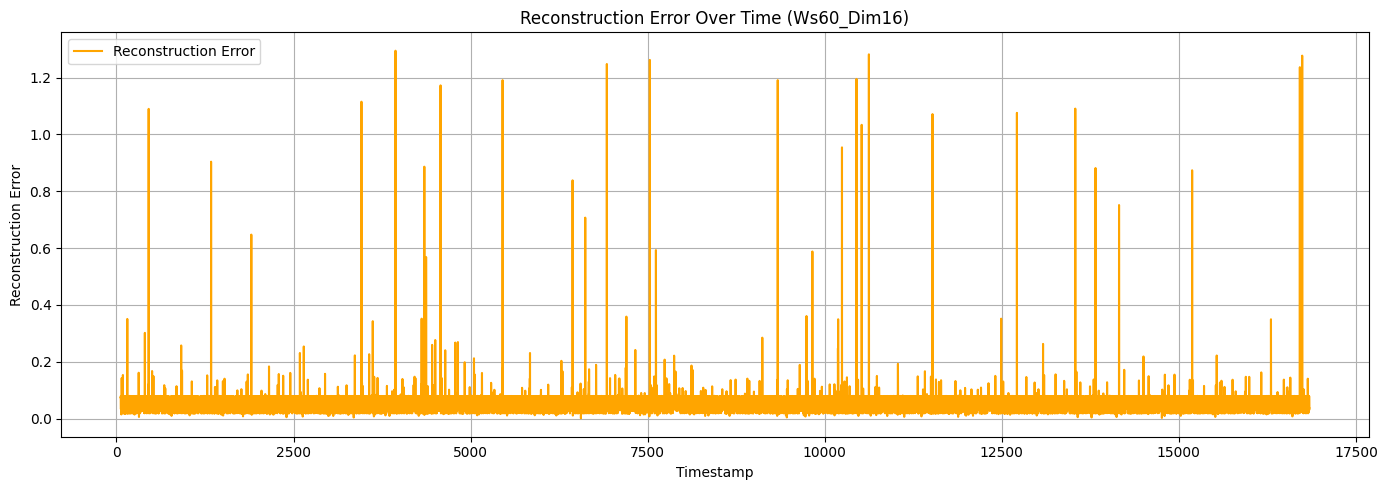

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the CSV for a specific configuration ===
csv_path = "/content/Peaks_Ws60_Dim16.csv"  # Change to your desired config
df = pd.read_csv(csv_path)

# === Step 2: Plot the Reconstruction Error over time ===
plt.figure(figsize=(14, 5))
plt.plot(df["Timestamp"], df["Reconstruction_Error"], label="Reconstruction Error", color="orange")

plt.title("Reconstruction Error Over Time (Ws60_Dim16)")
plt.xlabel("Timestamp")
plt.ylabel("Reconstruction Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

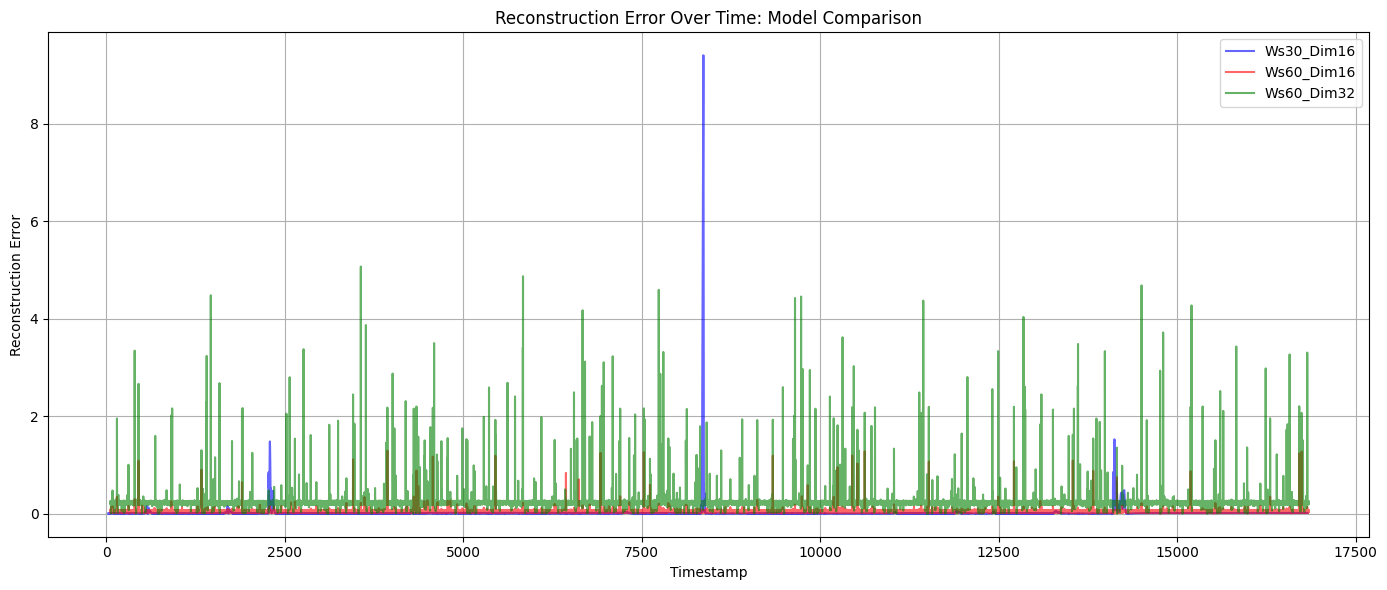

In [ ]:
plt.figure(figsize=(14, 6))

# Plot each with its own Timestamp
plt.plot(df_30_16["Timestamp"], df_30_16["Reconstruction_Error"], label="Ws30_Dim16", color="blue", alpha=0.6)
plt.plot(df_60_16["Timestamp"], df_60_16["Reconstruction_Error"], label="Ws60_Dim16", color="red", alpha=0.6)
plt.plot(df_60_32["Timestamp"], df_60_32["Reconstruction_Error"], label="Ws60_Dim32", color="green", alpha=0.6)

plt.title("Reconstruction Error Over Time: Model Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

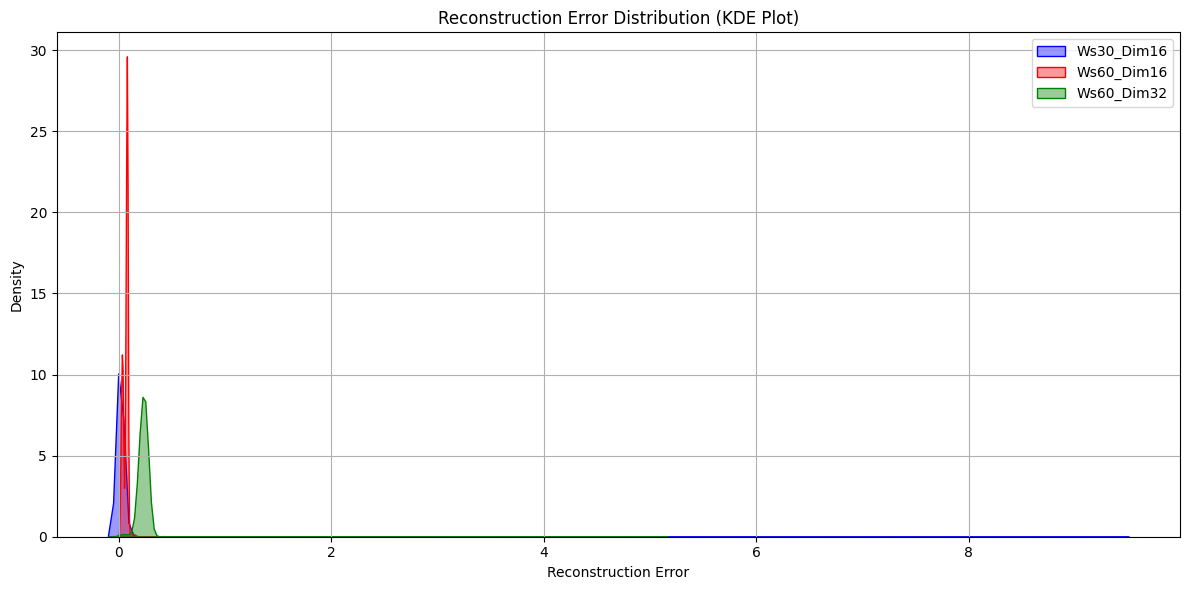

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Load your 3 result files ===
df_30_16 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df_60_16 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df_60_32 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

# === Step 2: Extract reconstruction error values ===
errors_30_16 = df_30_16["Reconstruction_Error"]
errors_60_16 = df_60_16["Reconstruction_Error"]
errors_60_32 = df_60_32["Reconstruction_Error"]

# === Step 3: Plot KDE curves on a single plot ===
plt.figure(figsize=(12, 6))

sns.kdeplot(errors_30_16, label="Ws30_Dim16", fill=True, color="blue", alpha=0.4)
sns.kdeplot(errors_60_16, label="Ws60_Dim16", fill=True, color="red", alpha=0.4)
sns.kdeplot(errors_60_32, label="Ws60_Dim32", fill=True, color="green", alpha=0.4)

plt.title("Reconstruction Error Distribution (KDE Plot)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

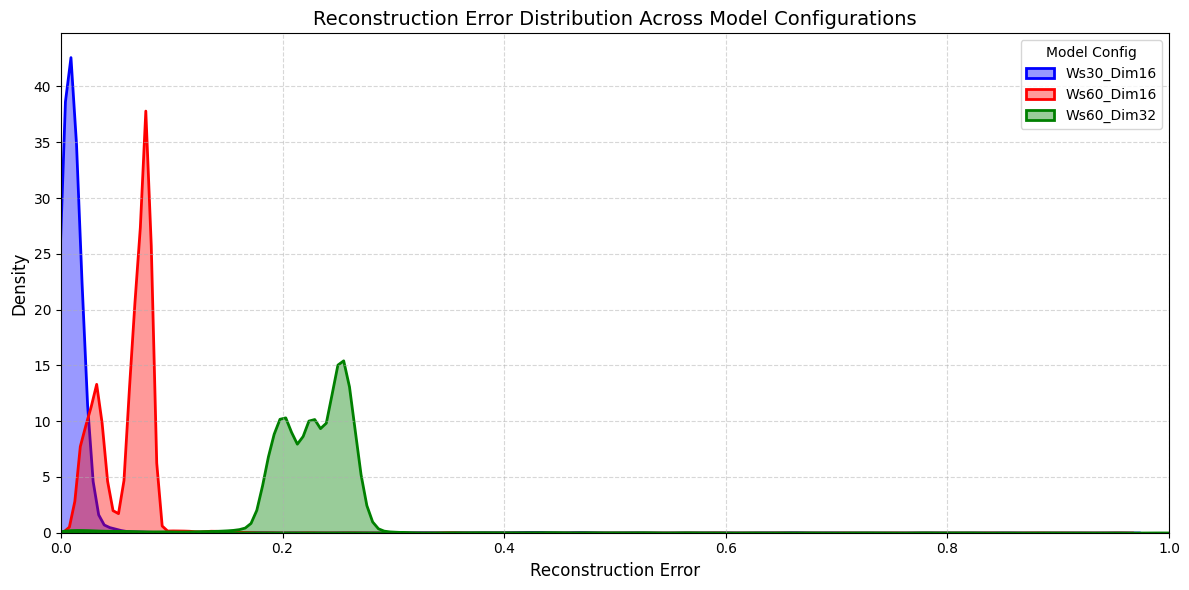

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load CSVs ===
df_30_16 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df_60_16 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df_60_32 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

# === Extract Errors ===
errors_30_16 = df_30_16["Reconstruction_Error"]
errors_60_16 = df_60_16["Reconstruction_Error"]
errors_60_32 = df_60_32["Reconstruction_Error"]

# === Clip extreme outliers (optional but useful for clarity) ===
clip_threshold = 1.0  # Set based on your data spread
errors_30_16_clipped = errors_30_16[errors_30_16 < clip_threshold]
errors_60_16_clipped = errors_60_16[errors_60_16 < clip_threshold]
errors_60_32_clipped = errors_60_32[errors_60_32 < clip_threshold]

# === Plot ===
plt.figure(figsize=(12, 6))
sns.kdeplot(errors_30_16_clipped, label="Ws30_Dim16", fill=True, color="blue", alpha=0.4, linewidth=2)
sns.kdeplot(errors_60_16_clipped, label="Ws60_Dim16", fill=True, color="red", alpha=0.4, linewidth=2)
sns.kdeplot(errors_60_32_clipped, label="Ws60_Dim32", fill=True, color="green", alpha=0.4, linewidth=2)

# === Enhancements ===
plt.xlim(0, clip_threshold)
plt.title("Reconstruction Error Distribution Across Model Configurations", fontsize=14)
plt.xlabel("Reconstruction Error", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Model Config", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

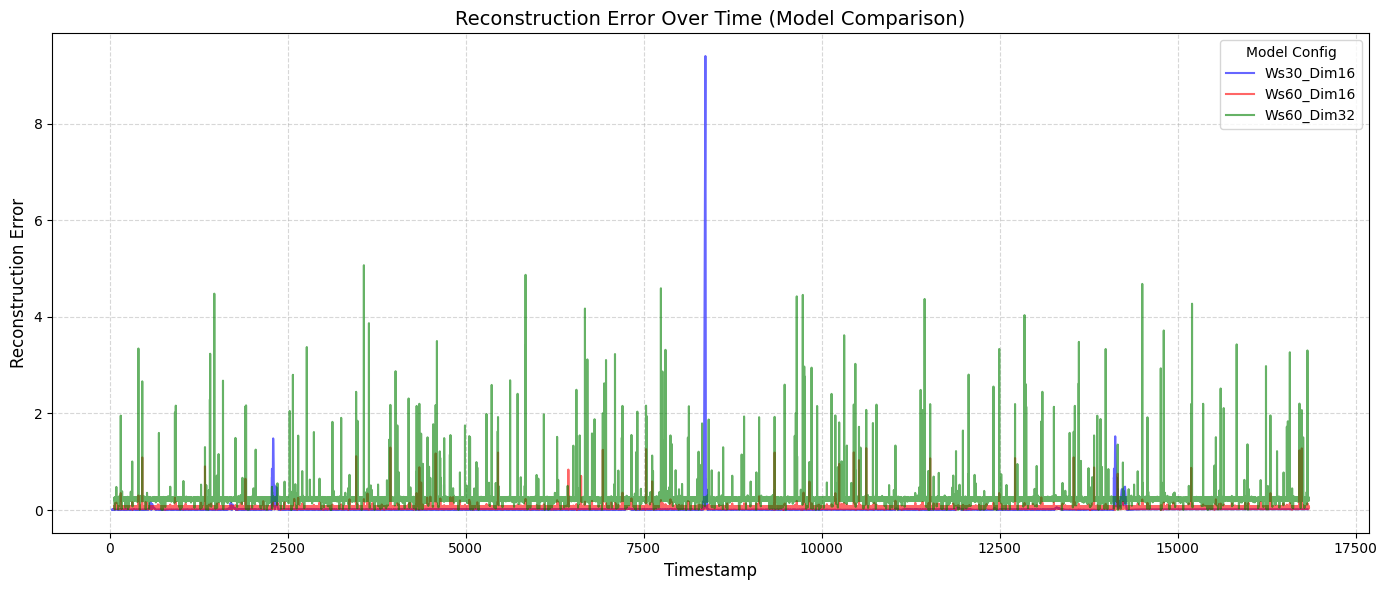

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load all 3 CSVs ===
df_30_16 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df_60_16 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df_60_32 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

# === Plot reconstruction error per timestamp ===
plt.figure(figsize=(14, 6))

plt.plot(df_30_16["Timestamp"], df_30_16["Reconstruction_Error"], label="Ws30_Dim16", color="blue", alpha=0.6)
plt.plot(df_60_16["Timestamp"], df_60_16["Reconstruction_Error"], label="Ws60_Dim16", color="red", alpha=0.6)
plt.plot(df_60_32["Timestamp"], df_60_32["Reconstruction_Error"], label="Ws60_Dim32", color="green", alpha=0.6)

plt.title("Reconstruction Error Over Time (Model Comparison)", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Reconstruction Error", fontsize=12)
plt.legend(title="Model Config", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

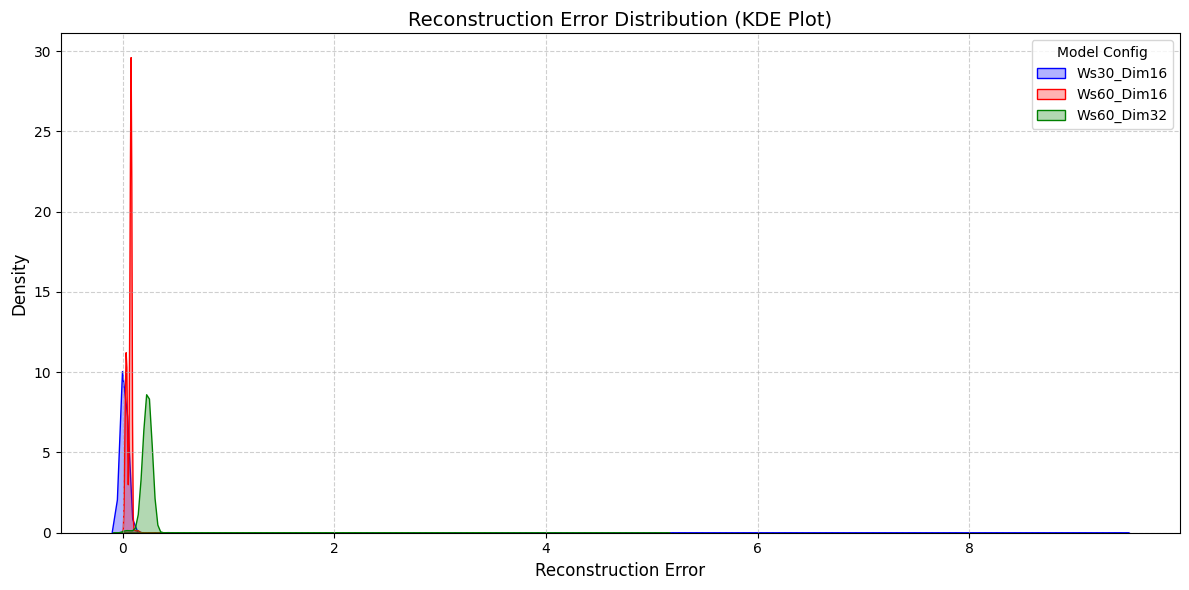

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load the CSVs ===
df_30_16 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df_60_16 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df_60_32 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

# === Setup Plot ===
plt.figure(figsize=(12, 6))
sns.kdeplot(df_30_16["Reconstruction_Error"], label="Ws30_Dim16", fill=True, color="blue", alpha=0.3)
sns.kdeplot(df_60_16["Reconstruction_Error"], label="Ws60_Dim16", fill=True, color="red", alpha=0.3)
sns.kdeplot(df_60_32["Reconstruction_Error"], label="Ws60_Dim32", fill=True, color="green", alpha=0.3)

# === Labeling and Styling ===
plt.title("Reconstruction Error Distribution (KDE Plot)", fontsize=14)
plt.xlabel("Reconstruction Error", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Model Config")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

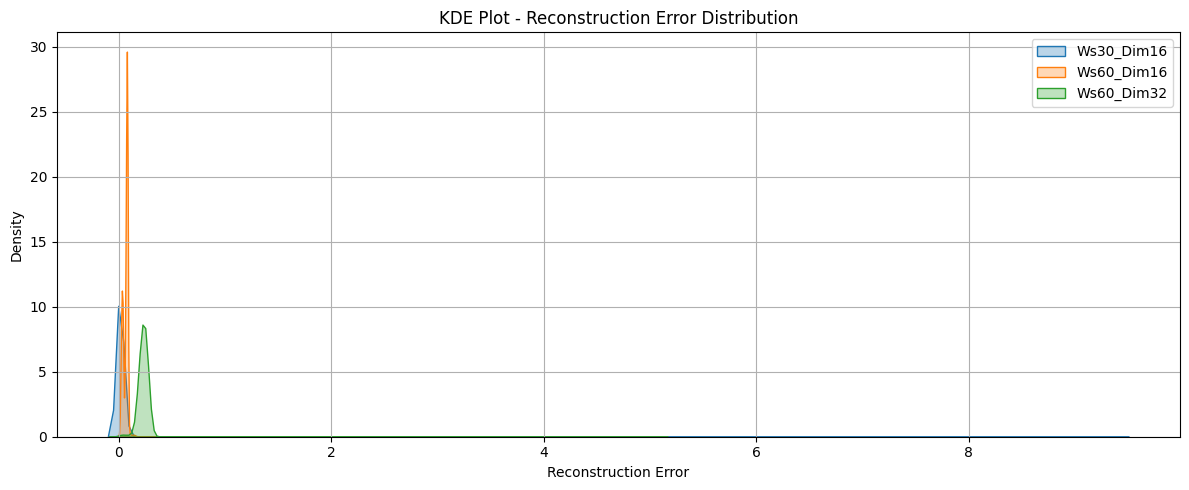

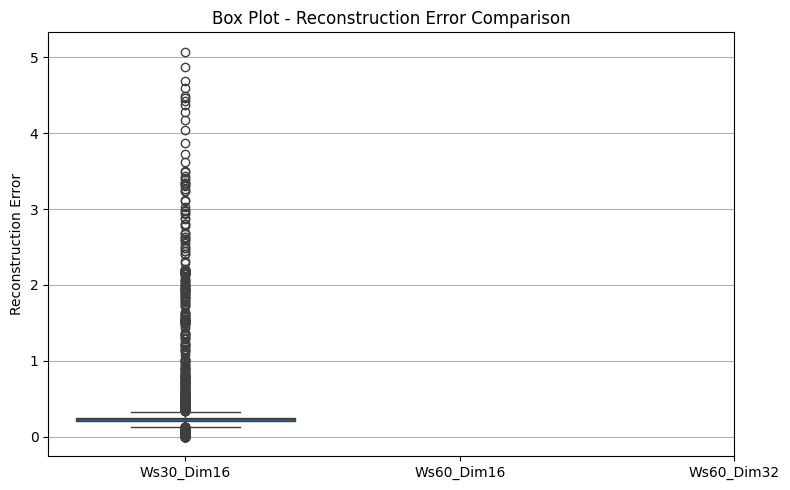

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df1 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df2 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df3 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

errs = [df1["Reconstruction_Error"], df2["Reconstruction_Error"], df3["Reconstruction_Error"]]
labels = ["Ws30_Dim16", "Ws60_Dim16", "Ws60_Dim32"]

# === KDE Plot
plt.figure(figsize=(12, 5))
for e, l in zip(errs, labels):
    sns.kdeplot(e, label=l, fill=True, alpha=0.3)
plt.title("KDE Plot - Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=errs)
plt.xticks([0, 1, 2], labels)
plt.title("Box Plot - Reconstruction Error Comparison")
plt.ylabel("Reconstruction Error")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# === Load all your peak CSVs ===
df_30_16 = pd.read_csv("/content/Peaks_Ws30_Dim16.csv")
df_60_16 = pd.read_csv("/content/Peaks_Ws60_Dim16.csv")
df_60_32 = pd.read_csv("/content/Peaks_Ws60_Dim32.csv")

# === Extract peak indices ===
peaks_30_16 = set(df_30_16[df_30_16["Peak"] == 1]["Timestamp"])
peaks_60_16 = set(df_60_16[df_60_16["Peak"] == 1]["Timestamp"])
peaks_60_32 = set(df_60_32[df_60_32["Peak"] == 1]["Timestamp"])

# === Find common & unique peak indices ===
common_peaks = peaks_30_16 & peaks_60_16 & peaks_60_32     # Detected by all 3
only_30_16   = peaks_30_16 - (peaks_60_16 | peaks_60_32)    # Only model 1
only_60_16   = peaks_60_16 - (peaks_30_16 | peaks_60_32)    # Only model 2
only_60_32   = peaks_60_32 - (peaks_30_16 | peaks_60_16)    # Only model 3

# === Print Results ===
print("✅ Total Peaks:")
print(f"  Ws30_Dim16: {len(peaks_30_16)}")
print(f"  Ws60_Dim16: {len(peaks_60_16)}")
print(f"  Ws60_Dim32: {len(peaks_60_32)}")

print(f"\n🔁 Common Peaks in All 3: {len(common_peaks)}")
print(f"❌ Only in Ws30_Dim16: {len(only_30_16)}")
print(f"❌ Only in Ws60_Dim16: {len(only_60_16)}")
print(f"❌ Only in Ws60_Dim32: {len(only_60_32)}")

# Optional: Save these as CSV for inspection
pd.DataFrame(sorted(common_peaks), columns=["Common_Peak_Timestamps"]).to_csv("common_peaks.csv", index=False)

✅ Total Peaks:
  Ws30_Dim16: 336
  Ws60_Dim16: 336
  Ws60_Dim32: 336

🔁 Common Peaks in All 3: 4
❌ Only in Ws30_Dim16: 329
❌ Only in Ws60_Dim16: 89
❌ Only in Ws60_Dim32: 88


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import math
from torch.nn import TransformerEncoder, TransformerEncoderLayer, TransformerDecoder, TransformerDecoderLayer
from tensorflow.keras.optimizers import Adam
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import accuracy_score, f1_score
plt.style.use("seaborn-v0_8")
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# === Step 1: Load CSV ===
csv_path = "/content/DMC2_S_CP2_52.csv"
df = pd.read_csv(csv_path)
print("✅ Step 1 - Loaded CSV Shape:", df.shape)

# === Step 2: Extract 'CURRENT|6' column as univariate input x ===
target_col = "CURRENT|6"

x = df[[target_col]].values  # shape: (T, 1)
print("✅ Step 2 - Extracted x shape:", x.shape)

# === Step 3: Normalize x using MinMaxScaler ===
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print("✅ Step 3 - Normalized x. Shape:", x_scaled.shape)



✅ Step 1 - Loaded CSV Shape: (42016, 56)
✅ Step 2 - Extracted x shape: (42016, 1)
✅ Step 3 - Normalized x. Shape: (42016, 1)

 n_train : 25209


In [ ]:
# === Step 4: Create sliding windows ===
dim = 32          # Model dimension (used for projecting input)
window_size = 30

def create_sliding_windows(data, window_size):
    return np.array([data[i:i + window_size] for i in range(len(data) - window_size)])

# shape: [N_windows, window_size, 1]
X_all = create_sliding_windows(x_scaled, window_size)
print("✅ Step 4 - Created sliding windows. Shape:", X_all.shape)

✅ Step 4 - Created sliding windows. Shape: (41986, 30, 1)


In [ ]:
# === Step 5: Chronological Train-Test Split (60% - 40%) ===
n_total = X_all.shape[0]
n_train = int(n_total * 0.6)

print(f"\n n_train :", n_train)

X_train = X_all[:n_train]  # First 60%
X_test = X_all[n_train:]   # Remaining 40%

print("✅ Step 5 - Train/Test split")
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

# === Step 6: Convert to PyTorch tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # [B, T, 1]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

print("\n\n✅ Step 6 - Converted to torch tensors.")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor :", X_test_tensor.shape)


 n_train : 25191
✅ Step 5 - Train/Test split
Train shape: (25191, 30, 1)
Test shape : (16795, 30, 1)

 X_test_tensor : tensor([[[0.5458],
         [0.5451],
         [0.5449],
         ...,
         [0.5459],
         [0.5458],
         [0.5457]],

        [[0.5451],
         [0.5449],
         [0.5453],
         ...,
         [0.5458],
         [0.5457],
         [0.5458]],

        [[0.5449],
         [0.5453],
         [0.5454],
         ...,
         [0.5457],
         [0.5458],
         [0.5458]],

        ...,

        [[0.5658],
         [0.5658],
         [0.5659],
         ...,
         [0.5659],
         [0.5659],
         [0.5659]],

        [[0.5658],
         [0.5659],
         [0.5659],
         ...,
         [0.5659],
         [0.5659],
         [0.5659]],

        [[0.5659],
         [0.5659],
         [0.5658],
         ...,
         [0.5659],
         [0.5659],
         [0.5659]]])


✅ Step 6 - Converted to torch tensors.
X_train_tensor: torch.Size([25191, 30, 1])
X_

In [ ]:
# === Step 1: Load CSV ===
csv_path = "/content/DMC2_S_CP2_52.csv"
df = pd.read_csv(csv_path)
print("✅ Step 1 - Loaded CSV Shape:", df.shape)

# === Step 2: Extract 'CURRENT|6' column as univariate input x ===
target_col = "CURRENT|6"

x = df[[target_col]].values  # shape: (T, 1)

print(f"\n\n x target value ", x)
print("✅ Step 2 - Extracted x shape:", x.shape)

# === Step 3: Normalize x using MinMaxScaler ===
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print("✅ Step 3 - Normalized x. Shape:", x_scaled.shape)


# === Step 4: Create sliding windows ===
dim = 32          # Model dimension (used for projecting input)
window_size = 30

def create_sliding_windows(data, window_size):
    return np.array([data[i:i + window_size] for i in range(len(data) - window_size)])

# shape: [N_windows, window_size, 1]
X_all = create_sliding_windows(x_scaled, window_size)
print("✅ Step 4 - Created sliding windows. Shape:", X_all.shape)


# === Step 5: Chronological Train-Test Split (60% - 40%) ===
n_total = X_all.shape[0]
n_train = int(n_total * 0.6)

print(f"\n n_train :", n_train)

X_train = X_all[:n_train]  # First 60%
X_test = X_all[n_train:]   # Remaining 40%

print("✅ Step 5 - Train/Test split")
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

# === Step 6: Convert to PyTorch tensors ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # [B, T, 1]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

print("\n\n✅ Step 6 - Converted to torch tensors.")
print("X_train_tensor:", X_train_tensor.shape)
print("X_test_tensor :", X_test_tensor.shape)

✅ Step 1 - Loaded CSV Shape: (42016, 56)


 x target value  [[ 0.      ]
 [ 0.      ]
 [ 0.      ]
 ...
 [-0.015381]
 [-0.015381]
 [-0.015381]]
✅ Step 2 - Extracted x shape: (42016, 1)
✅ Step 3 - Normalized x. Shape: (42016, 1)
✅ Step 4 - Created sliding windows. Shape: (41986, 30, 1)

 n_train : 25191
✅ Step 5 - Train/Test split
Train shape: (25191, 30, 1)
Test shape : (16795, 30, 1)


✅ Step 6 - Converted to torch tensors.
X_train_tensor: torch.Size([25191, 30, 1])
X_test_tensor : torch.Size([16795, 30, 1])


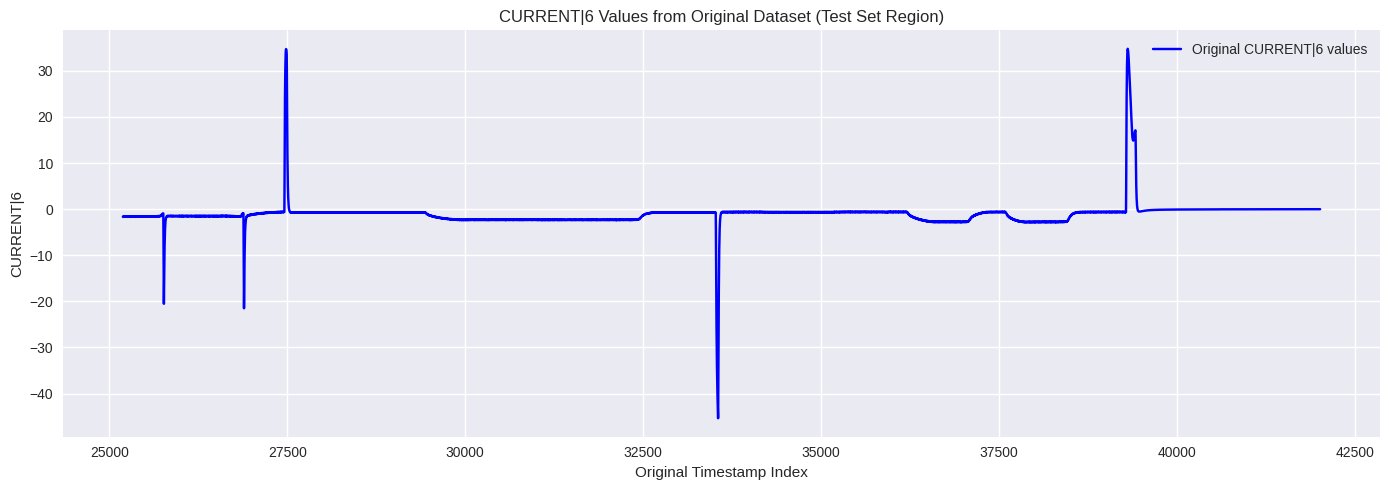

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the original dataset ===
csv_path = "/content/DMC2_S_CP2_52.csv"
df = pd.read_csv(csv_path)

# === Step 2: Define the start index of test set ===
start_test_index = 25191  # This is where your test sliding windows start

# === Step 3: Extract the CURRENT|6 column for test data ===
target_col = "CURRENT|6"
test_series = df.loc[start_test_index:, target_col].reset_index(drop=True)

# === Step 4: Create timestamps for plotting ===
timestamps = list(range(start_test_index, start_test_index + len(test_series)))

# === Step 5: Plot CURRENT|6 values over original timestamps ===
plt.figure(figsize=(14, 5))
plt.plot(timestamps, test_series, color="blue", label="Original CURRENT|6 values")
plt.xlabel("Original Timestamp Index")
plt.ylabel("CURRENT|6")
plt.title("CURRENT|6 Values from Original Dataset (Test Set Region)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

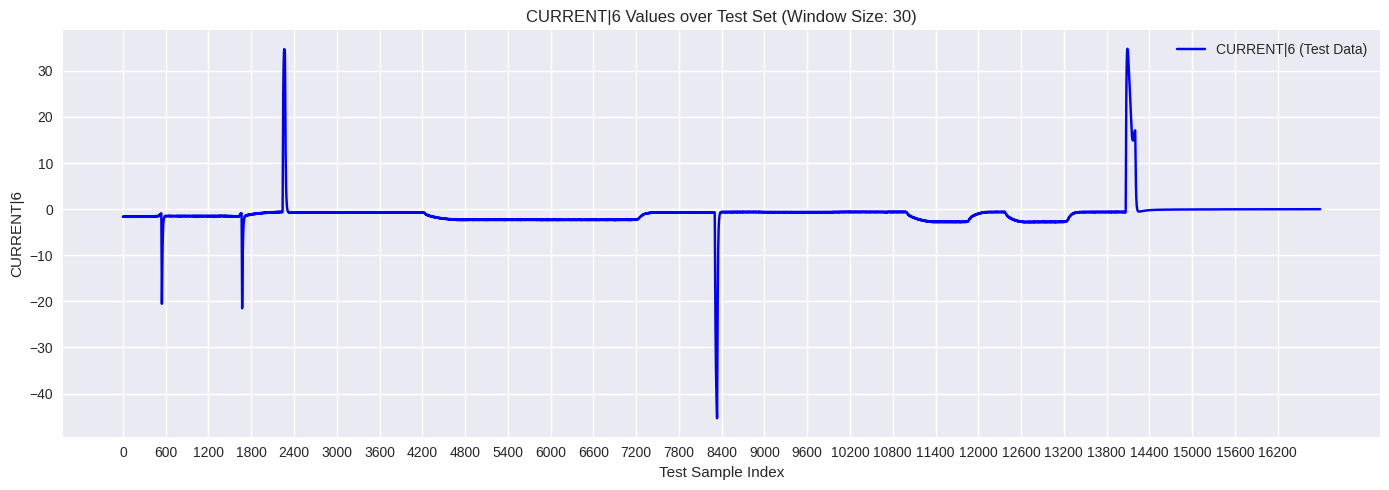

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load original dataset ===
csv_path = "/content/DMC2_S_CP2_52.csv"
df = pd.read_csv(csv_path)

# === Step 2: Your config ===
window_size = 30  # or 60 depending on the model
start_test_index = 25191
target_col = "CURRENT|6"

# === Step 3: Number of test samples (i.e., sliding windows)
n_test_samples = len(df) - start_test_index - window_size + 1

# === Step 4: Get the true values at the end of each test window
true_indices = [start_test_index + window_size - 1 + i for i in range(n_test_samples)]
test_series = df.loc[true_indices, target_col].reset_index(drop=True)

# === Step 5: Create test x-axis as 0 to len(test) - 1
test_x_axis = list(range(n_test_samples))  # from 0 to ~16,000

# === Step 6: Plot clean chart with renumbered x-axis ===
plt.figure(figsize=(14, 5))
plt.plot(test_x_axis, test_series, color="blue", label="CURRENT|6 (Test Data)")
plt.xlabel("Test Sample Index")  # now x-axis is 0–16,000
plt.ylabel("CURRENT|6")
plt.title(f"CURRENT|6 Values over Test Set (Window Size: {window_size})")
plt.xticks(ticks=range(0, len(test_series), 600))  # 👈 Change spacing here
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

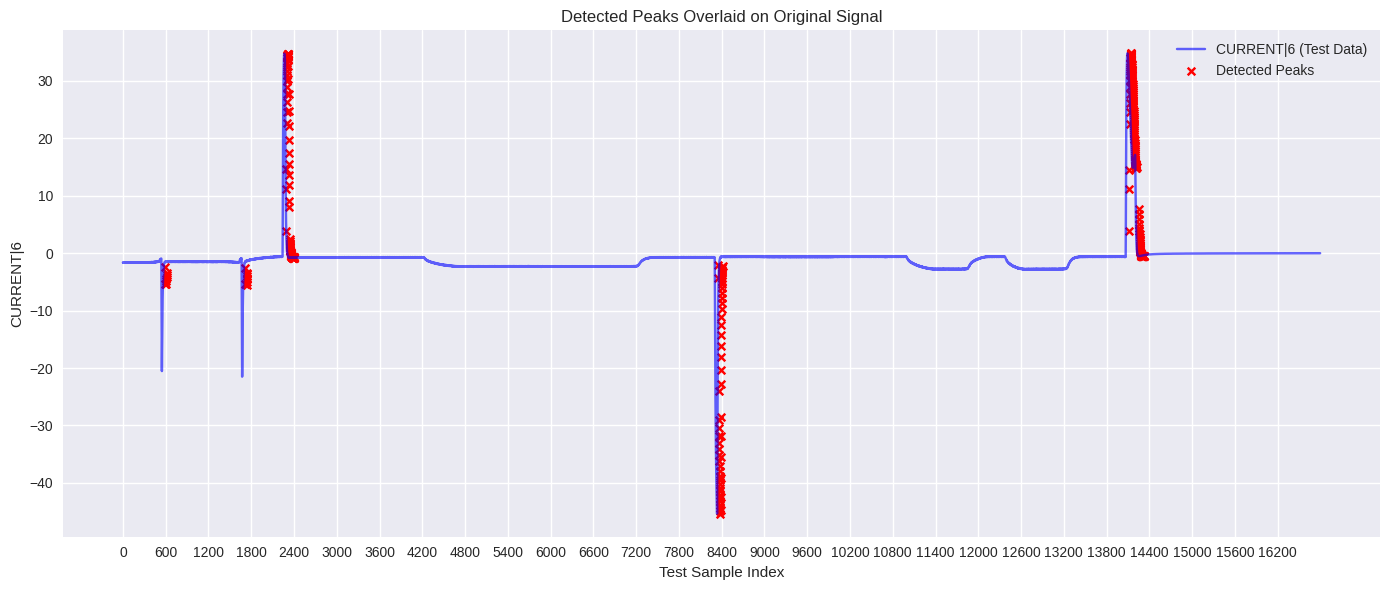

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load predicted peak results (from your model output) ===
peak_csv_path = "/content/Peaks_Ws60_Dim16.csv"  # Update this path
peak_df = pd.read_csv(peak_csv_path)

# === Step 2: Filter only the rows where peak == 1 ===
peaks_only = peak_df[peak_df["Peak"] == 1]

# === Step 3: Extract timestamp and true value of detected peaks ===
peak_timestamps = peaks_only["Timestamp"].values
peak_values = peaks_only["True_Value"].values

# === Step 4: Plot original test series (you already created this) ===
plt.figure(figsize=(14, 6))
plt.plot(test_x_axis, test_series, label="CURRENT|6 (Test Data)", color="blue", alpha=0.6)

# === Step 5: Overlay the detected peaks ===
plt.scatter(peak_timestamps, peak_values, color="red", label="Detected Peaks", s=30, marker="x")

plt.xlabel("Test Sample Index")
plt.ylabel("CURRENT|6")
plt.title("Detected Peaks Overlaid on Original Signal")
plt.xticks(ticks=range(0, len(test_series), 600))  # 👈 Change spacing here
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

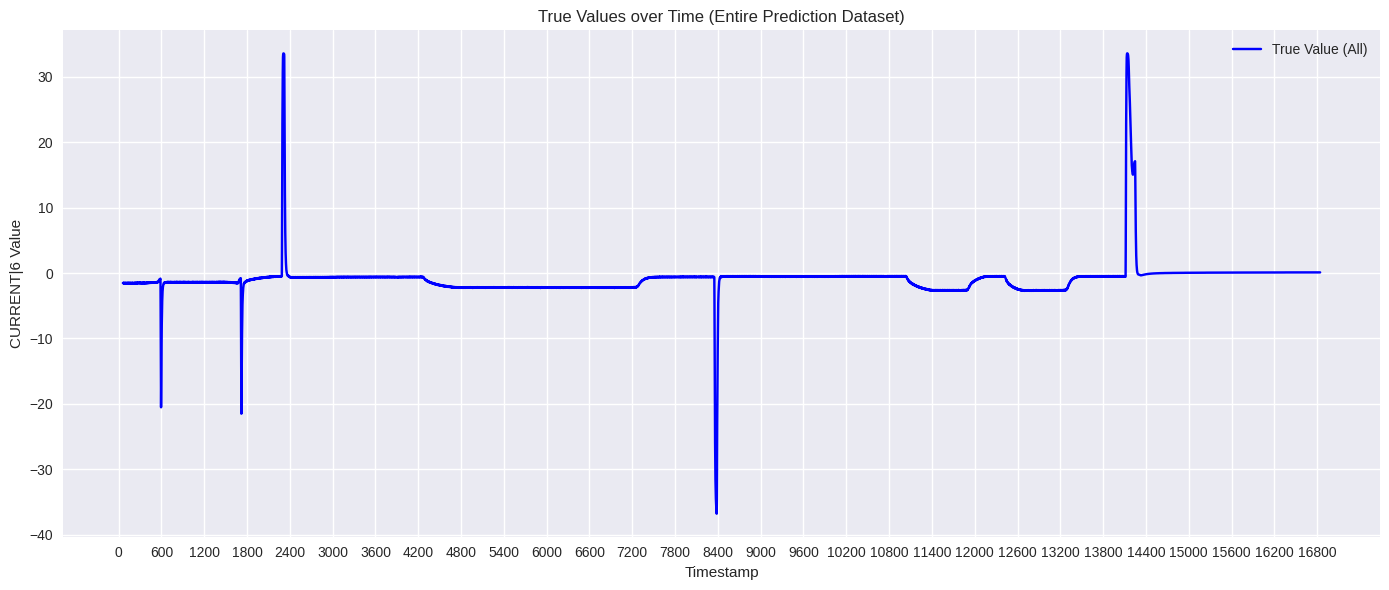

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the predicted results (entire peak dataset) ===
peak_csv_path = "/content/Peaks_Ws60_Dim16.csv"
peak_df = pd.read_csv(peak_csv_path)

# === Step 2: Extract timestamps and true values (ALL rows) ===
timestamps = peak_df["Timestamp"].values
true_values = peak_df["Reconstructed_Value"].values

# === Step 3: Plot the True Values across all timestamps ===
plt.figure(figsize=(14, 6))
plt.plot(timestamps, true_values, label="True Value (All)", color="blue")

plt.xlabel("Timestamp")
plt.ylabel("CURRENT|6 Value")
plt.title("True Values over Time (Entire Prediction Dataset)")
plt.xticks(ticks=range(0, max(timestamps), 600))  # Optional: Adjust tick spacing
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# === Step 1: Load the original CSV ===
csv_path = "/content/DMC2_S_CP2_52.csv"
df = pd.read_csv(csv_path)

# === Step 2: Extract target column ===
target_col = "CURRENT|6"
target_df = df[[target_col]].copy()

# === Step 3: Compute difference between consecutive values ===
target_df['Diff'] = target_df[target_col].diff()

# === Step 4: Drop the first row with NaN (optional but clean) ===
target_df.dropna(inplace=True)

# === Step 5: Save to new CSV ===
output_path = "/content/target_with_diff.csv"
target_df.to_csv(output_path, index=False)

print(f"✅ Saved target column with difference to: {output_path}")

✅ Saved target column with difference to: /content/target_with_diff.csv


In [ ]:
import pandas as pd

# === Step 1: Load the predicted peaks CSV ===
peak_csv_path = "/content/Peaks_Ws30_Dim16.csv"  # Update path if needed
df = pd.read_csv(peak_csv_path)

print("\nnpeak_csv_path : ", peak_csv_path)

# === Step 2: Define your threshold (choose based on your earlier percentile or manual value) ===
threshold_value = 0.068225  # Example: 98th percentile or custom

# === Step 3: Filter rows with RE > threshold ===
above_threshold = df[df["Reconstruction_Error"] > threshold_value]

# === Step 4: Print results ===
print(f"🔎 Threshold used: {threshold_value}")
print(f"📈 Total values above threshold: {len(above_threshold)}")

# Optional: Save these to CSV
# above_threshold.to_csv("/content/above_threshold_peaks.csv", index=False)


npeak_csv_path :  /content/Peaks_Ws30_Dim16.csv
🔎 Threshold used: 0.068225
📈 Total values above threshold: 336


🔹 98th Percentile of Reconstruction Error: 0.15659


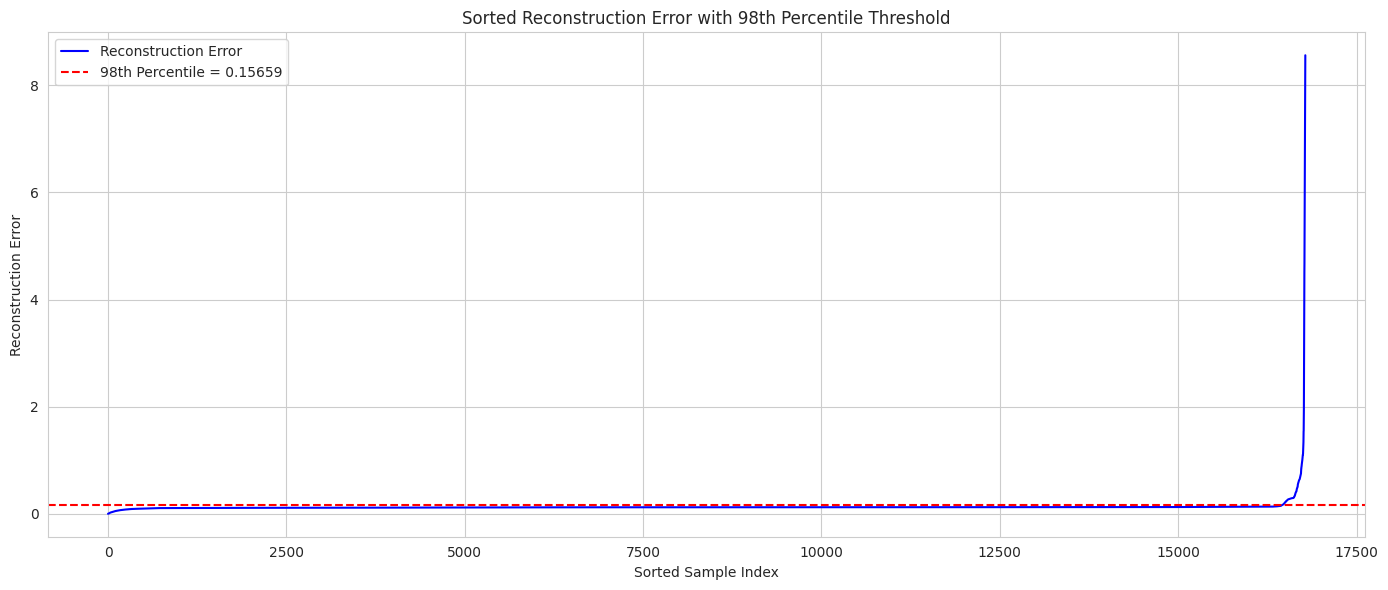

✅ Sorted reconstruction errors saved to: /content/Sorted_Reconstruction_Error.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load your peaks dataset ===
peak_csv_path = "/content/Peaks_Ws60_Dim16.csv"  # Update path if needed
df = pd.read_csv(peak_csv_path)

# === Step 2: Sort by reconstruction error in ascending order ===
df_sorted = df.sort_values(by="Reconstruction_Error").reset_index(drop=True)

# === Step 3: Calculate 98th percentile threshold ===
threshold_98 = np.percentile(df["Reconstruction_Error"], 98)
print(f"🔹 98th Percentile of Reconstruction Error: {threshold_98:.5f}")

# === Step 4: Plot reconstruction error vs. index (not original timestamps) ===
plt.figure(figsize=(14, 6))
plt.plot(df_sorted.index, df_sorted["Reconstruction_Error"], label="Reconstruction Error", color="blue")
plt.axhline(y=threshold_98, color="red", linestyle="--", label=f"98th Percentile = {threshold_98:.5f}")

plt.title("Sorted Reconstruction Error with 98th Percentile Threshold")
plt.xlabel("Sorted Sample Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("peak_venn_diagram.png", dpi=900, bbox_inches='tight')
plt.show()

# === Step 5: Save the sorted DataFrame to CSV ===
sorted_csv_path = "/content/Sorted_Reconstruction_Error.csv"
df_sorted.to_csv(sorted_csv_path, index=False)
print(f"✅ Sorted reconstruction errors saved to: {sorted_csv_path}")

In [ ]:
import pandas as pd

# Load your sorted CSV
df = pd.read_csv("/content/Sorted_Reconstruction_Error.csv")  # update path if needed

# Separate peak and non-peak data
df_peaks = df[df["Peak"] == 1]
df_non_peaks = df[df["Peak"] == 0]

# Define function to compute stats
def summarize_stats(group_df, label):
    stats = {
        f"{label} Count": len(group_df),
        f"{label} Mean": group_df["Reconstruction_Error"].mean(),
        f"{label} Median": group_df["Reconstruction_Error"].median(),
        f"{label} Std Dev": group_df["Reconstruction_Error"].std(),
        f"{label} Min": group_df["Reconstruction_Error"].min(),
        f"{label} Max": group_df["Reconstruction_Error"].max(),
        f"{label} 98th Percentile": group_df["Reconstruction_Error"].quantile(0.98)
    }
    return stats

# Collect stats
peak_stats = summarize_stats(df_peaks, "Peak")
non_peak_stats = summarize_stats(df_non_peaks, "Non-Peak")

# Combine and display
summary_df = pd.DataFrame([peak_stats, non_peak_stats])
import seaborn as sns
import matplotlib.pyplot as plt

print("\n📊 Statistical Summary of Reconstruction Errors:")
print(summary_df.T)

# Optional: Save summary
summary_df.T.to_csv("/content/Peak_NonPeak_Stats.csv")


📊 Statistical Summary of Reconstruction Errors:
                                   0             1
Peak Count                336.000000           NaN
Peak Mean                   0.746672           NaN
Peak Median                 0.298519           NaN
Peak Std Dev                1.337906           NaN
Peak Min                    0.157669           NaN
Peak Max                    8.559402           NaN
Peak 98th Percentile        6.549024           NaN
Non-Peak Count                   NaN  16447.000000
Non-Peak Mean                    NaN      0.119979
Non-Peak Median                  NaN      0.122957
Non-Peak Std Dev                 NaN      0.011165
Non-Peak Min                     NaN      0.001244
Non-Peak Max                     NaN      0.155978
Non-Peak 98th Percentile         NaN      0.131292


🔍 Overlap counts between configs:

Ws30_Dim16 ∩ Ws30_Dim32: 276 peaks
Ws30_Dim16 ∩ Ws60_Dim16: 186 peaks
Ws30_Dim16 ∩ Ws60_Dim32: 212 peaks
Ws30_Dim32 ∩ Ws60_Dim16: 198 peaks
Ws30_Dim32 ∩ Ws60_Dim32: 204 peaks
Ws60_Dim16 ∩ Ws60_Dim32: 245 peaks


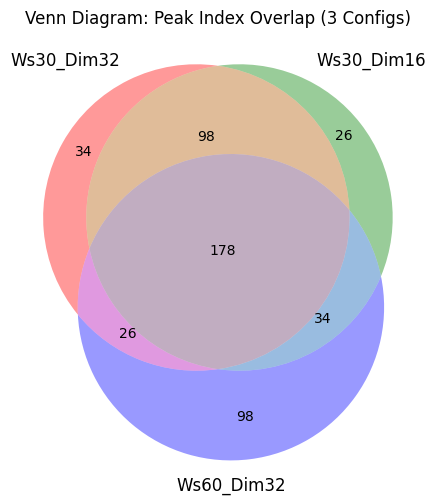

In [ ]:
import pandas as pd

file_paths = {
    "Ws30_Dim16": "/content/Peaks_Ws30_Dim16.csv",
    "Ws30_Dim32": "/content/Peaks_Ws30_Dim32.csv",
    "Ws60_Dim16": "/content/Peaks_Ws60_Dim16.csv",
    "Ws60_Dim32": "/content/Peaks_Ws60_Dim32.csv"
}

peak_sets = {}
for name, path in file_paths.items():
    df = pd.read_csv(path)
    peaks = set(df[df["Peak"] == 1]["Timestamp"].astype(int))
    peak_sets[name] = peaks


from itertools import combinations

print("🔍 Overlap counts between configs:\n")
for a, b in combinations(peak_sets.keys(), 2):
    overlap = len(peak_sets[a].intersection(peak_sets[b]))
    print(f"{a} ∩ {b}: {overlap} peaks")


from matplotlib import pyplot as plt
from matplotlib_venn import venn3

set1 = peak_sets["Ws30_Dim32"]
set2 = peak_sets["Ws30_Dim16"]
set3 = peak_sets["Ws60_Dim32"]

plt.figure(figsize=(8, 6))
venn3([set1, set2, set3], set_labels=("Ws30_Dim32", "Ws30_Dim16", "Ws60_Dim32"))
plt.title("Venn Diagram: Peak Index Overlap (3 Configs)")
plt.savefig("peak_venn_diagram.png", dpi=900, bbox_inches='tight')  # You can increase dpi to 600+
plt.show()